In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
DATA_PATH = '/content/drive/MyDrive/CICLO 2025-1/PROGRAMACIÓN EN FINANZAS/PARCIAL/bank-additional-full (1).csv'

# Descripción de datos

**1. Variables personales del cliente**
- age (Numérica): Edad del cliente.

- job (Categórica): Profesión (admin., technician, services, etc.).

- marital (Categórica): Estado civil (single, married, divorced).

- education (Categórica): Nivel educativo.

- default (Categórica): ¿Tiene impago de crédito anterior? (yes/no).

- housing (Categórica): ¿Tiene crédito hipotecario? (yes/no).

- loan (Categórica): ¿Tiene préstamo personal? (yes/no).

**Nota: Algunas de estas variables contienen el valor 'unknown' en lugar de NaN.


**2. Variables de campaña**
- contact (Categórica): Tipo de contacto (celular o teléfono fijo).

- month (Categórica): Mes del último contacto.

- day_of_week (Categórica): Día de la semana del contacto.

- duration (Numérica): Duración de la última llamada (en segundos).

- campaign (Numérica): Número de contactos durante la campaña actual.

- pdays (Numérica): Días desde el último contacto previo (999 = nunca contactado).

- previous (Numérica): Número de contactos previos.

- poutcome (Categórica): Resultado de campaña anterior (success, failure, nonexistent).

**3. Variables macroeconómicas**
- emp.var.rate (Numérica): Tasa de variación del empleo.

- cons.price.idx (Numérica): Índice de precios al consumidor.

- cons.conf.idx (Numérica): Índice de confianza del consumidor.

- euribor3m (Numérica): Tasa del EURIBOR a 3 meses.

- nr.employed (Numérica): Número promedio de empleados.

**4. Variable objetivo**
- y (Categórica): ¿El cliente contrató el depósito a plazo fijo? (yes/no)

In [ ]:
df = pd.read_csv(DATA_PATH, sep=';')
print('Dimensiones originales:', df.shape)
display(df.head())


Dimensiones originales: (41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.dtypes


,0
age,int64
job,object
marital,object
education,object
default,object
housing,object
loan,object
contact,object
month,object
day_of_week,object


In [ ]:
df.isnull().sum(axis = 0)


,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [ ]:
from IPython.display import display

# Estadísticas descriptivas para variables numéricas
desc_num_df = df.describe().T

# Estadísticas descriptivas para variables categóricas (objetos)
desc_cat_df = df.describe(include='object').T

print("Variables Numéricas")
display(desc_num_df)

print("Variables Categóricas")
display(desc_cat_df)


Variables Numéricas


,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


Variables Categóricas


,count,unique,top,freq
job,41188,12,admin.,10422
marital,41188,4,married,24928
education,41188,8,university.degree,12168
default,41188,3,no,32588
housing,41188,3,yes,21576
loan,41188,3,no,33950
contact,41188,2,cellular,26144
month,41188,10,may,13769
day_of_week,41188,5,thu,8623
poutcome,41188,3,nonexistent,35563


In [ ]:
df_imput = df.copy()


In [ ]:
# Crear columna 'id'
df_imput['id'] = range(1, len(df_imput) + 1)

cols = ['id'] + [col for col in df_imput.columns if col != 'id']
df_imput = df_imput[cols]


Verificamos si hay **unknowns**

In [ ]:
unknown_counts = df.apply(lambda col: (col.astype(str).str.lower() == 'unknown').sum())
unknown_counts = unknown_counts[unknown_counts > 0]

print(unknown_counts)


job           330
marital        80
education    1731
default      8597
housing       990
loan          990
dtype: int64


In [ ]:
# Columnas con 'unknown'
cols_with_unknown = ['job', 'marital', 'education', 'default', 'housing', 'loan']

# Reemplazar 'unknown' por np.nan
df_imput[cols_with_unknown] = df_imput[cols_with_unknown].replace('unknown', np.nan)

# Reemplazar np.nan por la moda
for col in cols_with_unknown:
    df_imput[col] = df_imput[col].fillna(df_imput[col].mode()[0])


In [ ]:
unknown_counts = df_imput.apply(lambda col: (col.astype(str).str.lower() == 'unknown').sum())
unknown_counts = unknown_counts[unknown_counts > 0]
print(unknown_counts)



Series([], dtype: int64)


In [ ]:
display(df_imput.head())


,id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1,56,housemaid,married,basic.4y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,2,57,services,married,high.school,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,3,37,services,married,high.school,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,4,40,admin.,married,basic.6y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,5,56,services,married,high.school,no,no,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
DATA_PATH = '/content/drive/MyDrive/CICLO 2025-1/PROGRAMACIÓN EN FINANZAS/PARCIAL/'

df_imput['y'] = df_imput['y']
df_imput.to_csv(DATA_PATH + 'bank_additional.clientes_tb.csv', index=False)

Hacemos los 3 datasets:
- Información del cliente: Contiene las características personales y crediticias del cliente
- Historial de campañas de contacto: Contiene el historial de contacto y resultados anteriores.-
- Variables económicas y resultado (si contrató o no)


In [ ]:
# Información demográfica del cliente
cols_clientes = ['age','job','marital','education','default','housing','loan']
clientes_df = df_imput[cols_clientes].copy()

# Historial de campañas de contacto
cols_campanas = ['contact','month','day_of_week','duration',
                 'campaign','pdays','previous','poutcome']
campanas_df = df_imput[cols_campanas].copy()

# Variables macroeconómicas (sin y)
cols_macro = ['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
macro_df = df_imput[cols_macro].copy()

# Variable objetivo
y = df_imput['y'].copy()


In [ ]:
for name, tbl in [('clientes', clientes_df),
                  ('campañas', campanas_df),
                  ('macro', macro_df),
                  ('objetivo (y)', y.to_frame())]:
    print(f"\n— Tabla {name} —  (filas, columnas):", tbl.shape)
    display(tbl.head())



— Tabla clientes —  (filas, columnas): (41188, 7)


,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,no,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes



— Tabla campañas —  (filas, columnas): (41188, 8)


,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
0,telephone,may,mon,261,1,999,0,nonexistent
1,telephone,may,mon,149,1,999,0,nonexistent
2,telephone,may,mon,226,1,999,0,nonexistent
3,telephone,may,mon,151,1,999,0,nonexistent
4,telephone,may,mon,307,1,999,0,nonexistent



— Tabla macro —  (filas, columnas): (41188, 5)


,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,93.994,-36.4,4.857,5191.0
1,1.1,93.994,-36.4,4.857,5191.0
2,1.1,93.994,-36.4,4.857,5191.0
3,1.1,93.994,-36.4,4.857,5191.0
4,1.1,93.994,-36.4,4.857,5191.0



— Tabla objetivo (y) —  (filas, columnas): (41188, 1)


,y
0,no
1,no
2,no
3,no
4,no


Distribución de variables

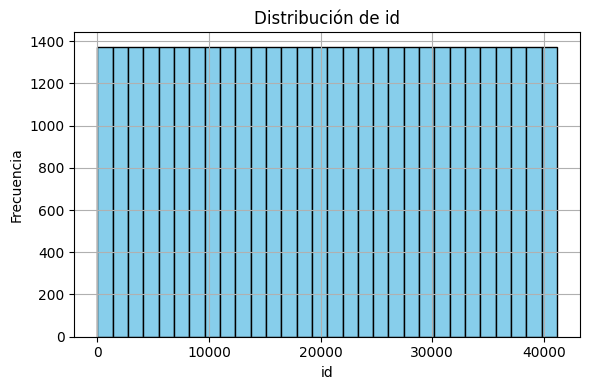

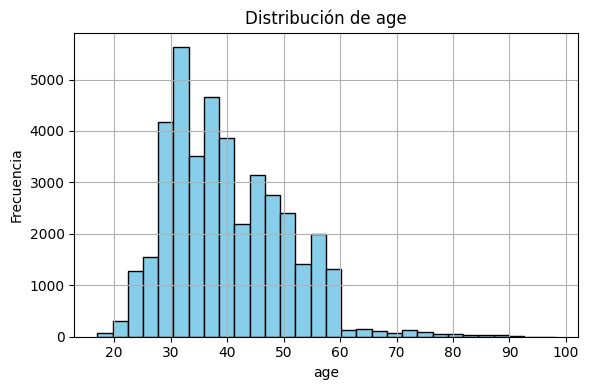

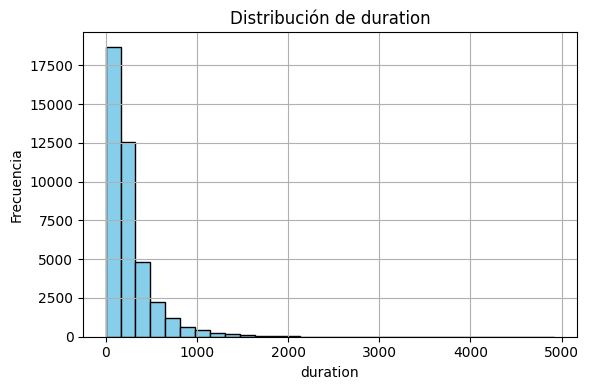

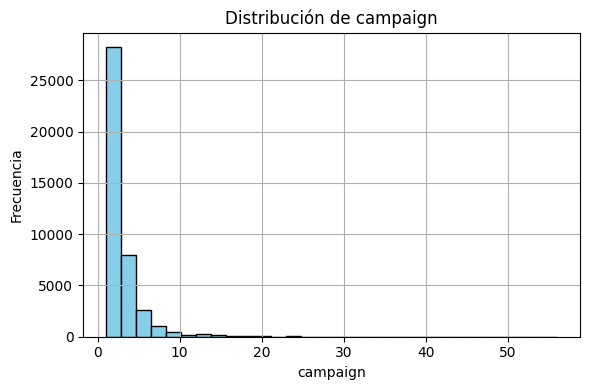

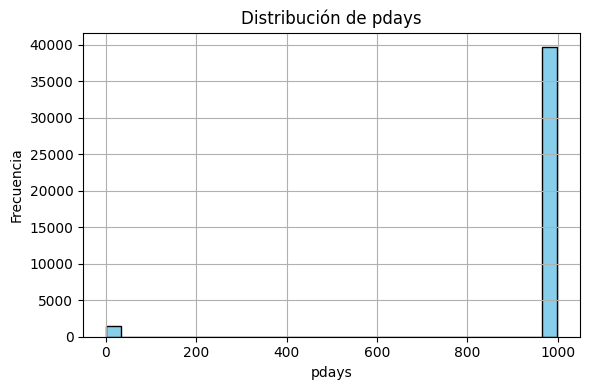

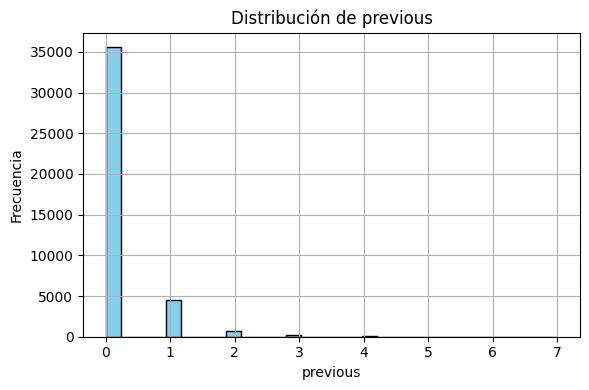

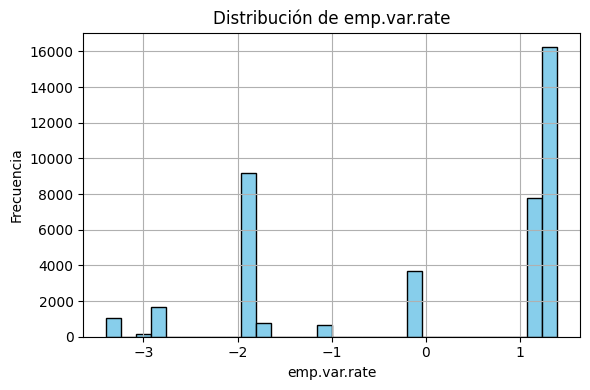

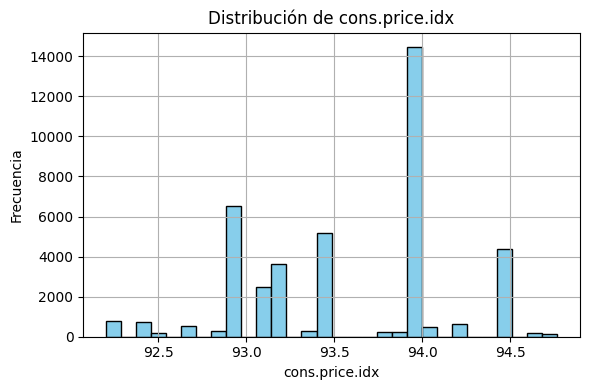

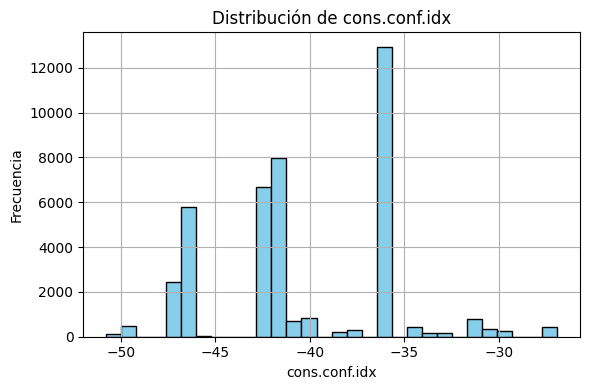

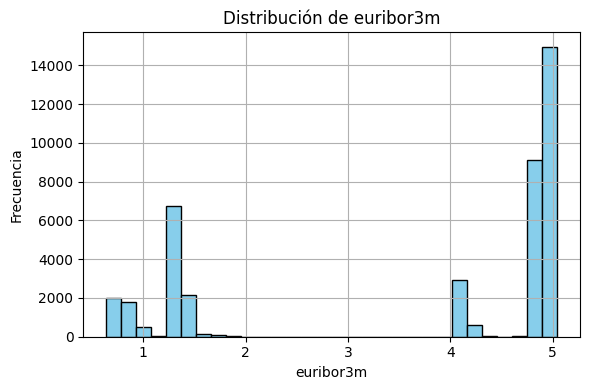

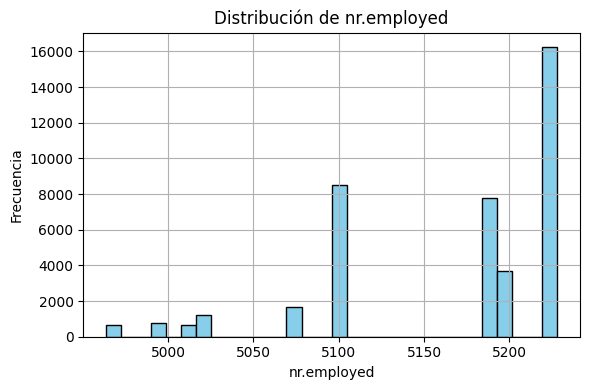

In [ ]:
import matplotlib.pyplot as plt

# Seleccionar variables numéricas
numeric_cols = df_imput.select_dtypes(include=['int64', 'float64']).columns

# Graficar histogramas
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    plt.hist(df_imput[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Ingeniería de variables

**Para variables de campañas**

- previous → prev_contacto_bin: Se asigna 'yes' si el cliente fue contactado en campañas anteriores (previous > 0), 'no' si nunca fue contactado antes.

- pdays → fue_contactado_antes: Se transforma en 'yes' si fue contactado recientemente (pdays ≠ 999), 'no' si nunca fue contactado antes.

In [ ]:
campanas_df['prev_contacto_bin'] = df_imput['previous'].apply(lambda x: 'yes' if x > 0 else 'no')
campanas_df['fue_contactado_antes'] = df_imput['pdays'].apply(lambda x: 'yes' if x != 999 else 'no')

In [ ]:
display(campanas_df.head())

,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,prev_contacto_bin,fue_contactado_antes
0,telephone,may,mon,261,1,999,0,nonexistent,no,no
1,telephone,may,mon,149,1,999,0,nonexistent,no,no
2,telephone,may,mon,226,1,999,0,nonexistent,no,no
3,telephone,may,mon,151,1,999,0,nonexistent,no,no
4,telephone,may,mon,307,1,999,0,nonexistent,no,no


**Para variables macroeconómicas**

- emp.var.rate → emp_var_cat:
Se agrupó la tasa de variación del empleo en tres categorías ('Negativo', 'Estable', 'Positivo') usando pd.cut() para reflejar el contexto económico general de cada campaña.

- cons.conf.idx → confianza_cat:
Se clasificó el índice de confianza del consumidor en niveles ('Muy baja', 'Baja', 'Moderada'), facilitando la interpretación del sentimiento del mercado en distintos momentos.

- euribor3m → euribor_cat:
Se segmentó la tasa EURIBOR en tramos ('Baja', 'Media', 'Alta') para representar condiciones crediticias del mercado y analizar su impacto sobre las decisiones de los clientes.

- nr.employed → empleo_cuartil:
Se dividió el número de empleados promedio en cuartiles ('Q1', 'Q2') usando pd.qcut(), permitiendo comparar campañas según contextos laborales más o menos favorables.

In [ ]:
# emp_var_cat
macro_df['emp_var_cat'] = pd.cut(df_imput['emp.var.rate'],
                                           bins=[-5, -2, 0, 2],
                                           labels=['Negativo', 'Estable', 'Positivo'])

# confianza_cat
macro_df['confianza_cat'] = pd.cut(df_imput['cons.conf.idx'],
                                             bins=[-51, -45, -40, -30],
                                             labels=['Muy baja', 'Baja', 'Moderada'])
macro_df['confianza_cat'] = macro_df['confianza_cat'].cat.add_categories('Desconocida')


# euribor_cat
macro_df['euribor_cat'] = pd.cut(df_imput['euribor3m'],
                                            bins=[0, 2.5, 6],
                                            labels=['Baja', 'Alta'])

In [ ]:
moda_confianza = macro_df['confianza_cat'].mode()[0]
macro_df['confianza_cat'] = macro_df['confianza_cat'].fillna(moda_confianza)

In [ ]:
display(macro_df.head())

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,emp_var_cat,confianza_cat,euribor_cat
0,1.1,93.994,-36.4,4.857,5191.0,Positivo,Moderada,Alta
1,1.1,93.994,-36.4,4.857,5191.0,Positivo,Moderada,Alta
2,1.1,93.994,-36.4,4.857,5191.0,Positivo,Moderada,Alta
3,1.1,93.994,-36.4,4.857,5191.0,Positivo,Moderada,Alta
4,1.1,93.994,-36.4,4.857,5191.0,Positivo,Moderada,Alta


**Para variables de clientes**

- cliente_con_riesgo: variable binaria que identifica si el cliente presenta señales de riesgo crediticio. Se asigna 'yes' si tiene al menos uno de los siguientes en 'yes': default, loan o housing.

- nivel_educativo_simplificado: reagrupa el nivel educativo original en tres categorías más simples: 'bajo', 'medio' y 'alto'. También se incluye 'desconocido' para los casos con valor 'unknown'.

- estado_civil_binario: simplifica el estado civil a solo dos grupos: 'soltero' (si es single) y 'no_soltero' (si es married o divorced). Esto ayuda a detectar diferencias de comportamiento según autonomía personal.

- profesion_agregada: clasifica las profesiones en cuatro categorías funcionales: 'directivo', 'empleado', 'manual' y 'no_laboral', facilitando el análisis de perfiles ocupacionales y su relación con el producto ofrecido.

In [ ]:
# cliente_con_riesgo
clientes_df['cliente_con_riesgo'] = clientes_df[['default', 'loan', 'housing']].apply(
    lambda row: 'yes' if 'yes' in row.values else 'no', axis=1
)

# nivel_educativo_simplificado
clientes_df['nivel_educativo_simplificado'] = clientes_df['education'].replace({
    'basic.4y': 'bajo', 'basic.6y': 'bajo', 'basic.9y': 'bajo', 'illiterate': 'bajo',
    'high.school': 'medio', 'professional.course': 'medio',
    'university.degree': 'alto', 'unknown': 'desconocido'
})

# estado_civil_binario
clientes_df['estado_civil_binario'] = clientes_df['marital'].apply(
    lambda x: 'soltero' if x == 'single' else 'no_soltero'
)

# profesion_agregada
clientes_df['profesion_agregada'] = clientes_df['job'].replace({
    'management': 'directivo', 'entrepreneur': 'directivo',
    'admin.': 'empleado', 'technician': 'empleado', 'services': 'empleado',
    'blue-collar': 'manual', 'housemaid': 'manual',
    'retired': 'no_laboral', 'student': 'no_laboral', 'unemployed': 'no_laboral',
    'self-employed': 'empleado'
    })

In [ ]:
display(clientes_df.head())

,age,job,marital,education,default,housing,loan,cliente_con_riesgo,nivel_educativo_simplificado,estado_civil_binario,profesion_agregada
0,56,housemaid,married,basic.4y,no,no,no,no,bajo,no_soltero,manual
1,57,services,married,high.school,no,no,no,no,medio,no_soltero,empleado
2,37,services,married,high.school,no,yes,no,yes,medio,no_soltero,empleado
3,40,admin.,married,basic.6y,no,no,no,no,bajo,no_soltero,empleado
4,56,services,married,high.school,no,no,yes,yes,medio,no_soltero,empleado


# Analisis post ajustes


In [ ]:
clientes_desc_num = clientes_df.describe().T
clientes_desc_cat = clientes_df.describe(include='object').T

campanas_desc_num = campanas_df.describe().T
campanas_desc_cat = campanas_df.describe(include='object').T

macro_desc_num = macro_df.describe().T

In [ ]:
print("Clientes - Numéricas")
display(clientes_desc_num)
print("Clientes - Categóricas")
display(clientes_desc_cat)

print("Campañas - Numéricas")
display(campanas_desc_num)
print("Campañas - Categóricas")
display(campanas_desc_cat)

print("Macroeconómicas - Numéricas")
display(macro_desc_num)
print("Macroeconómicas - Categóricas")
display(macro_desc_cat)

Clientes - Numéricas


,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.02406,10.42125,17.0,32.0,38.0,47.0,98.0


Clientes - Categóricas


,count,unique,top,freq
job,41188,11,admin.,10752
marital,41188,3,married,25008
education,41188,7,university.degree,13899
default,41188,2,no,41185
housing,41188,2,yes,22566
loan,41188,2,no,34940
cliente_con_riesgo,41188,2,yes,25125
nivel_educativo_simplificado,41188,3,medio,14758
estado_civil_binario,41188,2,no_soltero,29620
profesion_agregada,41188,4,empleado,22885


Campañas - Numéricas


,count,mean,std,min,25%,50%,75%,max
duration,41188.0,258.285010,259.279249,0.0,102.0,180.0,319.0,4918.0
campaign,41188.0,2.567593,2.770014,1.0,1.0,2.0,3.0,56.0
pdays,41188.0,962.475454,186.910907,0.0,999.0,999.0,999.0,999.0
previous,41188.0,0.172963,0.494901,0.0,0.0,0.0,0.0,7.0


Campañas - Categóricas


,count,unique,top,freq
contact,41188,2,cellular,26144
month,41188,10,may,13769
day_of_week,41188,5,thu,8623
poutcome,41188,3,nonexistent,35563
prev_contacto_bin,41188,2,no,35563
fue_contactado_antes,41188,2,no,39673


Macroeconómicas - Numéricas


,count,mean,std,min,25%,50%,75%,max
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


Macroeconómicas - Categóricas


,count,unique,top,freq
empleo_cuartil,41188,2,Q1,21271


# Verificaciones adicionales

**Verificar colinealidad entre variables binarias de contacto (prev_contacto_bin, fue_contactado_antes, fue_contactado_en_campaña)**

Objetivo:
Explorar si estas tres variables derivadas del historial de contacto del cliente contienen información redundante, lo cual podría afectar modelos predictivos si se incluyen simultáneamente.

In [ ]:
# TABLA CRUZADA entre variables binarias de contacto (campañas_df)
vars_binarias_contacto = ['prev_contacto_bin', 'fue_contactado_antes', 'fue_contactado_en_campaña']

for i in range(len(vars_binarias_contacto)):
    for j in range(i + 1, len(vars_binarias_contacto)):
        var1 = vars_binarias_contacto[i]
        var2 = vars_binarias_contacto[j]
        print(f"\nTabla cruzada entre '{var1}' y '{var2}':")
        display(pd.crosstab(campanas_df[var1], campanas_df[var2], normalize='index', margins=True))

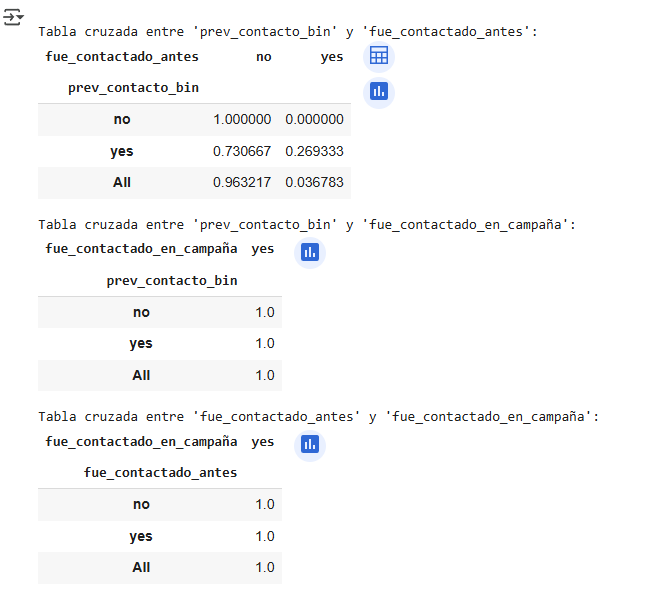

***procedi a eliminar fue contactado en la campaña, pues todos habían sido contactados en la campaña***

**Validar la distribución de categorías creadas en macro_resultado_df**
Queremos verificar que las variables como emp_var_cat, euribor_cat, confianza_cat y empleo_cuartil están bien distribuidas y no dominadas por una sola categoría. Esto garantiza que sí aportan variabilidad al modelo.

In [ ]:
# Revisar distribución de nuevas variables macroeconómicas categóricas
vars_macro_cat = ['emp_var_cat', 'euribor_cat', 'confianza_cat']

for col in vars_macro_cat:
    print(f"\nDistribución de la variable '{col}':")
    display(macro_df[col].value_counts(dropna=False, normalize=True).to_frame('% proporción'))


Distribución de la variable 'emp_var_cat':


,% proporción
emp_var_cat,
Positivo,0.582621
Estable,0.346824
Negativo,0.070555



Distribución de la variable 'euribor_cat':


,% proporción
euribor_cat,
Alta,0.672283
Baja,0.327717



Distribución de la variable 'confianza_cat':


,% proporción
confianza_cat,
Baja,0.405312
Moderada,0.379188
Muy baja,0.215500
Desconocida,0.000000


antes salia:

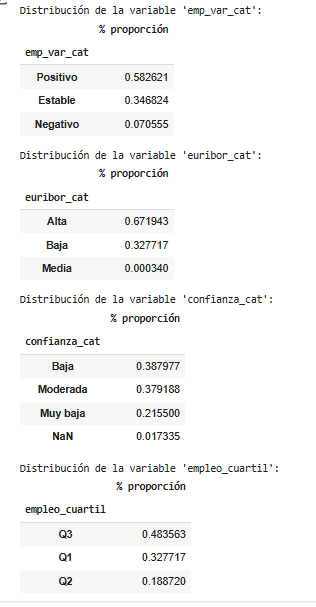

- ***euribor_cat (tasa de interés) ahora solo alta o baja
- se reemplzaó valores Nan y ahora son la moda***


**Verificar solapamiento entre cliente_con_riesgo y otras variables en clientes_df**
Si la variable cliente_con_riesgo es idéntica o muy parecida a otra (por ejemplo default o loan), podrías estar duplicando la misma información bajo otro nombre. Aquí se verifica si la agregación realmente resume varios casos.

In [ ]:
# Comparamos cliente_con_riesgo vs default, loan y housing
print("\nComparación entre 'cliente_con_riesgo' y sus componentes:")
componentes = ['default', 'loan', 'housing']
for comp in componentes:
    print(f"\nCruzando cliente_con_riesgo con {comp}:")
    display(pd.crosstab(clientes_df['cliente_con_riesgo'], clientes_df[comp], normalize='index', margins=True))

**Nota**: casi todo el peso está en housing

# Cubos dimensionales

In [ ]:
ATA_PATH = '/content/drive/MyDrive/CICLO 2025-1/PROGRAMACIÓN EN FINANZAS/PARCIAL/'

clientes_df['y'] = df_imput['y']
clientes_df.to_csv(DATA_PATH + 'clientes_cubo.csv', index=False)

campanas_df['y'] = df_imput['y']
campanas_df.to_csv(DATA_PATH + 'campanas_cubo.csv', index=False)

macro_df['y'] = df_imput['y']
macro_df.to_csv(DATA_PATH + 'macro_cubo.csv', index=False)